In [1]:
# Explanation for Part A
# We hav a catepillar trying to escape a 10 x 12 room. putting the origin of our room at the bottom
# corner, the catepillar is at (7,0) and the door is between (0,6) and (0, 8). First, we will find the
# chance of escape. The chance of escape is really just the % of possible paths that the catepillar can
# walk that end on the door.
# The catepillar can choose a trajectory that is in any one of the 180 degrees infront of it. This
# means that you can use the angle subtended by the door infront of the catepillar divided by 180 as
# the chance of escaping the room on the first move.
# We can find that angle by find the angle between x-axis and the line between the door's edges and
# the catepillar by taking the arctan(6/7) and then arctan (8/7). The difference between those is the angle
# we want

In [4]:
import numpy as np

import matplotlib.pyplot as plt

import math

import random


In [4]:
# Part A
# angle between the x-axis and the line between bottom edge of the door and the catepillar
angle_bottom = math.atan(6/7)

# angle between the x-axis and the line between top edge of the door and the catepillar
angle_top = math.atan(8/7)

# angle subtended by the door
door_angle = angle_top - angle_bottom
print(f'The angle subtended by the door is {door_angle} radians.')
escape_chance = door_angle/math.pi*100

print(f'The chance of escaping on the first move is {escape_chance} percent.')

The angle subtended by the door is 0.14334005504560177 radians.
The chance of escaping on the first move is 4.56265566071438 percent.


In [26]:
# Function for Part B
# To figure out how long it takes to escape on average, we can just simulate the movements of the
# catepillar through the room
def CatepillarSim():
    '''
    This function will simulate catepillar moving through the room. It stops when the catepillar escapes
    under the door positioned as described above. The floor of the room is 12 x 10.
    
    Inputs:
        none
    
    Outputs: 
        time: Float; how long in seconds the catepillar moved

        pos_history: list of 2 element tuples; the places the catepillar stopped
    '''
    # initializing the start point
    pos_history = [(7,0)]
    x,y = (7,0)
    # t is going to be the distance between our points. We can initialize some useful t containers
    t_history = []
    t_temp = np.zeros(4)
    
    # setting up the exit condition for your while loop
    while not (6 <= y <= 8 and x == 0):
        # this picks a random angular trajectory. technically it won't pick pi, but whatever...
        angle = math.pi*random.uniform(0,1)

        # convert this into a unit vector
        unit_x = math.cos(angle)
        unit_y = math.sin(angle)
        
        # Now we need to find the coordinate where the vector defined by the starting position and unit
        # vector connect with the different planes that make up the square
        # these are x = 0, x = 12, y = 0, y = 10
        # our vector is going to be final_point = starting point + t*unit_vector
        # x_f = x_i +t*u_x ==> t = (xf - xi) ux
        t_temp[0] = (0 - x)/unit_x
        t_temp[1] = (12 - x)/unit_x
        t_temp[2] = (0 - y)/unit_y
        t_temp[3] = (10 - y)/unit_y
        #reassign = 0
        for t in t_temp:
            # If t == 0 then we didn't move
            if not t == 0:
                # What are the coordinates for the given t
                x_temp = unit_x * t + x
                y_temp = unit_y * t + y
                # if those coordinates are inside the box then that is where we move to
                if 0 <= x_temp <= 12 and 0 <= y_temp <= 10:
                    x = x_temp
                    y = y_temp
                    pos_history.append((x_temp,y_temp))
                    # keep track of how far we move
                    t_history.append(abs(t))
                    break
            else:
                continue
    # covert the feet to cm
    dist = np.asarray(t_history) * 30.48
    time = np.sum(dist) /0.5
    return time, pos_history

        

In [27]:
time, pos_history = CatepillarSim()

print(time)
print(pos_history[-1])
print(np.size(pos_history))

13404.13771945639
(0.0, 7.962392719012845)
50


In [48]:
# Second Function for Part B
def CatepillarSimMulti(iters):
    '''
    This function runs the Catepillar some n times where n is given by iters.
    It records all the times and then reports the average of that and then builds out a histogram

    Inputs:
        iters: interger; number of times to run Catepillar sim

    Outputs:
        Prints the average escape time in hours
        Histogram of escape times in hours
    '''
    times = np.zeros(iters)
    for i in range(iters):
        time, pos_history = CatepillarSim()
        times[i] = time
    
    times_hrs = times/60/60
    avg_time = np.average(times_hrs)

    print(f'The average escape time for the catepillar is {avg_time} hours')

    fig = plt.figure(figsize = (7,4))
    plt.hist(times_hrs)
    plt.xlabel('Escape time (hours)')
    plt.ylabel('counts')
    plt.title('Histogram of escapetime')

The average escape time for the catepillar is 3.2241832024560733 hours


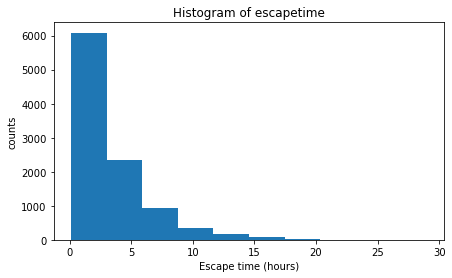

In [49]:
# Part B
CatepillarSimMulti(10000)

In [40]:
# Function for Part C.2
def ButterflySim():
    '''
    This function will simulate the wall to wall movement of the butterfly through 3 dimensions in a 
    12 by 10 by 8 room with a window in the center of the wall accross from the starting point of the
    butterfly. The window is 3 feet long and 2 feet high. The sim stops when the butterfly escapes
    through the window.
    
    Inputs:
        None
    
    Outputs:
        time: float; escape time in seconds

        pos_history: list of 3 element tuples; places where the butterfly landed
    '''
    # initializing the start point
    pos_history = [(7,0,0)]
    x,y,z = (7,0,0)
    # t is going to be the distance between our points. We can initialize some useful t containers
    t_history = []
    # We have 6 different planes to check
    t_temp = np.zeros(6)
    # the window is on the center of the wall across from the butterfly that point should be 
    # (6.5, 10, 4.5) and the window is 3 feet across (in x) and 2 feet high (in z)
    while not (y == 10 and 4.5 <= x <= 7.5 and 3.5 <= z <= 5.5):
        # in 3 dimensions we have two angles, the azimuth(theta) and the elevation(phi). The azimuth
        # varies between 0 and pi and the elevation varies between -pi/2 and pi/2
        # there might be some issues with how we pick phi becuase phi is usually defined as the angle
        # along the z axis, measured from the horizontal
        theta = math.pi*random.uniform(0,1)
        # we will probably never land on an edge, but we do start on an edge so lets make sure we pick
        # a possible phi (phi cannot be negative on a edge)
        if (y == 0 and z == 0):
            phi = math.pi*random.uniform(0,1)/2
        else:
            phi = math.pi*random.uniform(-1,1)/2
        # convert angles to unit vectors
        unit_x = math.cos(phi)*math.cos(theta)
        unit_y = math.cos(phi)*math.sin(theta)
        unit_z = math.sin(phi)
        # Just like before, we look for the intersection between our planes and the vector defined by
        # final_point = starting_point + t*unit_vector
        # this time, instead of hitting lines, we hit planes defined by 
        # z = 0, z = 8, y = 0, y = 10, x = 0, x = 12
        t_temp[0] = (0 - x)/unit_x
        t_temp[1] = (12 - x)/unit_x
        t_temp[2] = (0 - y)/unit_y
        t_temp[3] = (10 - y)/unit_y 
        t_temp[4] = (0 - z)/unit_z
        t_temp[5] = (8 - z)/unit_z
        
        for t in t_temp:
            # If t == 0 then we didn't move
            if not t == 0:
                
                # What are the coordinates for the given t
                x_temp = unit_x * t + x
                y_temp = unit_y * t + y
                z_temp = unit_z * t + z
                
                # if those coordinates are inside the box then that is where we move to
                if (0 <= x_temp <= 12 and 0 <= y_temp <= 10 and 0 <= z_temp <= 8):
                    x = x_temp
                    y = y_temp
                    z = z_temp
                    
                    pos_history.append((x_temp,y_temp, z_temp))
                    # keep track of how far we move
                    t_history.append(abs(t))
                    break
            else:
                continue
    # convert t_history to miles
    dist = np.asarray(t_history) / 5280
    # speed is 5 miles per hour, so this is time in hours
    time = np.sum(dist) /5
    return time, pos_history


In [41]:
time,pos_history = ButterflySim()

print(time)
print(pos_history[-1])
print(np.size(pos_history))


0.003770816542304667
(7.460937008686024, 10.0, 3.637267910158805)
54


In [52]:
# Second Function for Part C.2
def ButterflySimMulti(iters):
    '''
    This function runs the Butterfly some n times where n is given by iters.
    It records all the times and then reports the average of that and then builds out a histogram

    Inputs:
        iters: interger; number of times to run ButterflySim

    Outputs:
        Prints the average escape time in hours
        Histogram of escape times in hours
    '''
    times = np.zeros(iters)
    for i in range(iters):
        time, pos_history = ButterflySim()
        times[i] = time
    
    avg_time = np.average(times)

    print(f'The average escape time for the butterfly is {avg_time} hour')

    fig = plt.figure(figsize = (7,4))
    plt.hist(times)
    plt.xlabel('Escape time (hour)')
    plt.ylabel('counts')
    plt.title('Histogram of escape_time')

The average escape time for the butterfly is 0.03685864201432299 hour


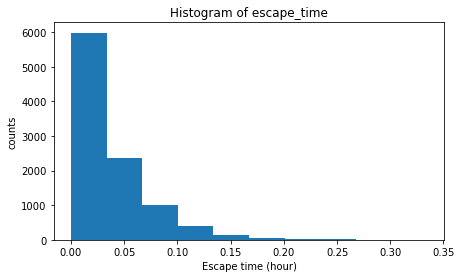

In [53]:
# Part C 2
ButterflySimMulti(10000)

In [54]:
# we have done this a little bit backwards. We found the average escape time before finding the chance
# of escape on the first move. Just as we can find the escape chance in the 2d case using the angle 
# subtended by the door, we can find the escape chance in the 3d case by the solid angle subtended by
# the window. However, the positioning of the window makes this really difficult to do, so instead we
# will find this by simulating the first step a few 1000 times to find the chance of escaping in one
# move

In [61]:
# Function for Part C.1
def ButterflySimStep1(iters):
    '''
    We are going to simulate the first step of ButterflySim n times, where n is iters. On each sim, we
    will collect a 1 if we escape and then a 0 if we don't into a list of results. then we can use the 
    sum of this list divided by its length to find the escape chance

    Inputs:
        iters: interger; number of times to simulate the first step

    Outputs:
        Prints the chance of escaping on the first movement 
    '''
    # initialize escape matrix
    escape = np.zeros(iters)
    # initial position
    x,y,z = (7,0,0)
    # loop iters times
    t_temp = np.zeros(6)
    for i in range(iters):
        # select our initial angles
        theta = math.pi*random.uniform(0,1)
        # We are on the edge, so we cannot move in the negative part of phi
        phi = math.pi*random.uniform(0,1)/2
        # get our unit vectors
        unit_x = math.cos(phi)*math.cos(theta)
        unit_y = math.cos(phi)*math.sin(theta)
        unit_z = math.sin(phi)
        # grab the t that intersect with each plane
        t_temp[0] = (0 - x)/unit_x
        t_temp[1] = (12 - x)/unit_x
        t_temp[2] = (0 - y)/unit_y
        t_temp[3] = (10 - y)/unit_y 
        t_temp[4] = (0 - z)/unit_z
        t_temp[5] = (8 - z)/unit_z
        # iterate through t_temp to see which move was possible
        for t in t_temp:
            # If t == 0 then we didn't move
            if not t == 0:
                
                # What are the coordinates for the given t
                x_temp = unit_x * t + x
                y_temp = unit_y * t + y
                z_temp = unit_z * t + z
                
                # if those coordinates are inside the box 
                if (0 <= x_temp <= 12 and 0 <= y_temp <= 10 and 0 <= z_temp <= 8):
                    # and if the the move puts us in the window
                    if (y_temp == 10 and 4.5 <= x_temp <= 7.5 and 3.5 <= z_temp <= 5.5):
                        escape[i] = 1
                    else: 
                        escape[i] = 0
                    break
            else:
                continue
    escape_chance = np.sum(escape)/np.size(escape)*100
    
    return escape_chance


In [68]:
# Part C1
escape_chance = ButterflySimStep1(1000000)

print(f'The chance of escape on the first step is {escape_chance} %!')

The chance of escape on the first step is 0.9813000000000001 %!
